# _Construcción de una tabla de frecuencias con Python_
____

A continuación se describe, paso a paso, la construcción de una tabla de frecuencias, la realización de una gráfica de barras a partir del histograma de los datos, ojiva y polígono de frecuencias mediante las librerías **_PANDAS_, _Numpy_ y _matplolib_** en python. Todo esto partiendo desde un archivo **.txt** con datos y utilizando el método de **_Sturges_** para el cálculo de las _**clases $(k)$**_.

In [309]:
# Importación de las librerías:

import matplotlib.pyplot as plt
import matplotlib.patches as polygon
from matplotlib.collections import PatchCollection
from scipy import stats
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
import math
import numpy as np
import csv
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
from shapely.geometry import Polygon,MultiPolygon



Los datos son previamente almacenados en una rchivo **.txt** sin ningún orden en especial o tipo de arreglo. Para este ejemplo, dicho archivo es llamado **frecuencias_ejemplo1.txt**.

Para ello necesitaremos la creación de dos objetos, de tipo _listas_, para la extracción de los datos y visualización. Las llamaremos `listas` y `datos`. Posteriormente se iterará en un _loop_ para su presentación, pero antes es necesario crear un tercer objeto, de tipo arreglo, que nos permitirá reailzar los cálculos pertinentes sobre cada dato. Lo llamaremos `np_datos`:

In [2]:
# Carga de los datos y lectura del archivo fuente.txt:

listas = []
datos=[]

with open('frecuencias_ejemplo1.txt', newline='') as archivo:
    for linea in csv.reader(archivo):
        listas.append(linea)

# Adisión de cada uno de los datos al objeto arreglo:

for lista in listas:
    for elemento in lista:
        datos.append(float(elemento))
        np_datos=np.sort(np.array(datos))
                         
print('los datos, ordenados, son los siguientes '+ str(np.sort(np_datos)), end=' ')

los datos, ordenados, son los siguientes [ 90.  95.  96. 108. 114. 116. 119. 123. 130. 141. 147. 149. 150. 151.
 154. 157. 163. 171. 172. 175. 178. 183. 185. 202. 206.] 

Posteriormente realizamos las operaciones básicas, de las medidas de tendencia central, para los datos no agrupados `media`, `mediana` y `moda` utilizando _**Numpy**_ sobre el objeto `np_datos` y las respectivas funciones:

In [3]:
# Número de datos
np_datos=np.array(datos)
print('El número total de datos(n) es: '+str(len(np_datos)))

# media 
print('la media es igual a: '+ str(np.mean(np_datos)))

# mediana
print('la mediana es igual a: '+ str(np.median(np_datos)))

# moda
print('la moda es igual a: '+ str(stats.mode(np_datos)))

El número total de datos(n) es: 25
la media es igual a: 147.0
la mediana es igual a: 150.0
la moda es igual a: ModeResult(mode=array([90.]), count=array([1]))


Cálculo de las cantidades índices de la tabla de frecuencia utilizando sobre el objeto `np_datos` y las funciones pertinentes:

In [4]:
# Máximos y Mínimos
print('El dato mayor es: '+np_datos.max().astype(str))
print('El dato menor es: '+np_datos.min().astype(str))

# Rango
rango=np_datos.max().astype(float)-np_datos.min().astype(float)
print('El rango(R) es igual a: '+ str(rango))

El dato mayor es: 206.0
El dato menor es: 90.0
El rango(R) es igual a: 116.0


In [5]:
# Amplitud y número de intervalos de clase utilizando el operador módulo para la verificación de cantidades pares o impares. 
""""""

# Omitase esta función si el número de intervalos de clase es proporcionado. Calculese la amplitud(A) de manera directa mediante (R/k) y
# coloquese, en lugar del parámetro "rests", en la siguiente función "intervalo" que es el siguiente bloque de este script.

# Esta fucnión calcula el número de intervalo de clases:

def inter_clases(k):
    print('Aplicando Sturges [1 + 3.322 (log(n))]: \n'
          '       (\u039A) es igual a ' +'"'+str(round(k,2))+'"'+'. El número aproximado de intervalos sería de ' +str(round(k))+',')
    
    # Confirmación de números pares mediante el módulo de un número:
    if round(k)%2==0:
        print('       pero '+str(round(k))+ ' es un número par. Por convención necesitamos tomar la cifra siguiete, que sea mayor e impar, o sea (\u039A)='+str(round(k+1))+'.\n'
         '       Y la amplitud(A) igual a (R/(\u039A)) es '+str(round(rango/round(k+1))))
        return round(rango/round(k+1))
       
    else:
        print('       y '+str(round(k)) + ' es un número impar. Por convención tomamos este número como cantidad de intervalos. Entonces (\u039A) es igual a '+str(round(k))+'.\n'
              '       Y la amplitud(A) igual a (R/(\u039A)) es '+str(round(rango/(round(k)))))
        return round(rango/(round(k)))

# Ejecución de la función "inter_clases" para obtener el número de clases (k) y la amplitud (A) en una variable llamada "rests". 
rests=inter_clases(1+(3.322*(math.log10(len(np_datos)))))

Aplicando Sturges [1 + 3.322 (log(n))]: 
       (Κ) es igual a "5.64". El número aproximado de intervalos sería de 6,
       pero 6 es un número par. Por convención necesitamos tomar la cifra siguiete, que sea mayor e impar, o sea (Κ)=7.
       Y la amplitud(A) igual a (R/(Κ)) es 17.0


In [6]:
# Creación de los intervalos
""""""

# Esta función recibe como parámetros (dato menor, dato mayor, amplitud) para calcular los intervalos de clase:
def intervalo(start, stop, step):
    i=start
    while i <= stop:
        yield i
        i+=step
        yield i

# Ejecución de la función "intervalo" y alojamiento de los resultado en una variable llamda "l_inter"
l_inter=[]
for i in intervalo(np_datos.min(), np_datos.max(),rests):
    l_inter.append(i)

# Construcción de una tupla para cada intervalo y creación de una lista de listas "t_iter" que aloja a cada una de ellas:
t_iter=np.array([i for i in zip(l_inter[::2],l_inter[1::2])]).tolist()
t_iter

[[90.0, 107.0],
 [107.0, 124.0],
 [124.0, 141.0],
 [141.0, 158.0],
 [158.0, 175.0],
 [175.0, 192.0],
 [192.0, 209.0]]

In [7]:
# Cálculo de las marcas de clase "x"
""""""

# Las marcas de clase son igual al promedio, entre cada uno d los L.I. y L.S., para cada intervalo de clase. Es necesario la construcción de un arreglo 
# sobre la lista "t_iter" y la aplicación de la función "np.mean()" para calcular el promedio de cada uno de los intervalos:
np_titer=np.array(t_iter)
macl=[np.mean(x) for x in np_titer]

# Cálculo de las frecuecias absolutas
""""""

# Función que realiza el conteo de los datos y asigna para cada intervalo de clase su frecuencia absoluta:
def frecuencia(li, min, max):
    ctr = 0
    for x in li:
        if min <= x < max:
            ctr += 1
    return ctr

# Ejecución de la función "frecuencias" para que pueda iterar sobre los rangos de la lista "t_iter". Los resultados son alojados 
# dentro de la variable "frec_abs":
frec_abs=[]
for d in t_iter:
    frec_abs.append(frecuencia(datos, d[0], d[1]))
    

# Cálulo de la frecuencia relativa
""""""

# Construimos un arreglo sobre la lista "frec_abs" y a cada elemento lo dividimos entre el número total de datos:
np_frec=np.array(frec_abs)
frec_re=[(f/(len(np_datos))) for f in np_frec]

# Cálculo de la frecuencia absoluta acumulada
""""""

# Pasamos como parámetro, a la función "np.cumsum", el arreglo "frec_abs":
frec_abs_ac=list(np.cumsum(frec_abs))



##### Los datos son alojados en un _Dataframe_ llamado **df_frec**.

In [8]:
df_frec=pd.DataFrame({'clases':t_iter,'marcas_clase':macl, 'frec_absoluta':frec_abs, 'frec_relativa':frec_re, 'frec_abs_acumulada':frec_abs_ac})
df_frec

,clases,marcas_clase,frec_absoluta,frec_relativa,frec_abs_acumulada
0,"[90.0, 107.0]",98.5,3,0.12,3
1,"[107.0, 124.0]",115.5,5,0.20,8
2,"[124.0, 141.0]",132.5,1,0.04,9
3,"[141.0, 158.0]",149.5,7,0.28,16
4,"[158.0, 175.0]",166.5,3,0.12,19
5,"[175.0, 192.0]",183.5,4,0.16,23
6,"[192.0, 209.0]",200.5,2,0.08,25


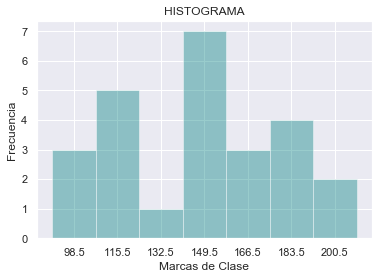

In [334]:
plt.title('HISTOGRAMA')
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.xticks(df_frec.marcas_clase)
sns.distplot(np_datos, bins=bins, hist=True, kde=False, color="teal", label='hola')
plt.show()

Creación del **Histograma:**

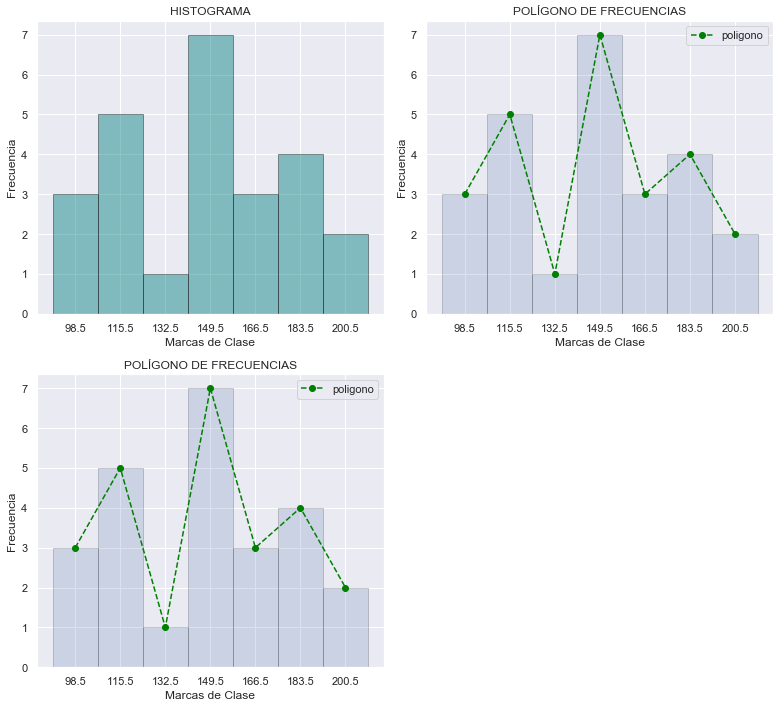

In [318]:
fig = plt.figure(figsize=(11,10))
# fig = plt.figure()

ax1 = fig.add_subplot(221)

def intervalo(start, stop, step):
    i=start
    while i <= stop:
        i+=step
        yield i

# Ejecución de la función "intervalo" y alojamiento de los resultado en una variable llamda "l_inter"
l_inter=[]
for i in intervalo(np_datos.min(), np_datos.max(),rests):
    l_inter.append(i)

# Construcción de los "bins" (marcas de clase) del histogramas:
b1=[np_datos.min().tolist()]
b2=[float(b) for b in l_inter]
bins=b1+b2

# Impresión del Histograma con "Mathplotlib":
plt.hist(np_datos, bins=bins, histtype='bar', edgecolor='k',alpha=.45, color='teal') 
plt.xticks(df_frec.marcas_clase)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.title('HISTOGRAMA')
# plt.show()

ax2 = fig.add_subplot(222)
plt.plot(macl,frec_abs, color='green', marker='o', linestyle='dashed', )
plt.xticks(df_frec.marcas_clase)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
# plt.title('POLÍGONO DE FRECUENCIAS')
plt.hist(np_datos, bins=bins, histtype='bar', edgecolor='k',alpha=0.2) 
plt.xticks(df_frec.marcas_clase)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.title('POLÍGONO DE FRECUENCIAS')
plt.legend(['poligono']) 

ax3 = fig.add_subplot(223)

plt.plot(macl,frec_abs, color='green', marker='o', linestyle='dashed', )
plt.xticks(df_frec.marcas_clase)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
# plt.title('POLÍGONO DE FRECUENCIAS')
plt.hist(np_datos, bins=bins, histtype='bar', edgecolor='k',alpha=0.2) 
plt.xticks(df_frec.marcas_clase)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.title('POLÍGONO DE FRECUENCIAS')
plt.legend(['poligono']) 
# plt.show
fig.tight_layout()

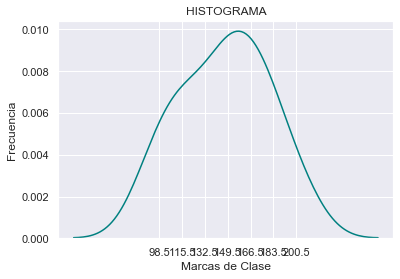

In [370]:
plt.title('HISTOGRAMA')
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.xticks(df_frec.marcas_clase)
sns.distplot(np_datos, bins=bins, hist=False, kde=True, color="teal", norm_hist=True)
plt.show()